In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_sas('data/SMQ_L.xpt')
df.to_csv('data/raw data files/smoking.csv', index=False)
print('Successfully converted to csv.')

In [6]:
test_df = pd.read_csv('data/raw data files/vitamind.csv')
test_df

,SEQN,WTPH2YR,LBXVIDMS,LBDVIDLC,LBXVD2MS,LBDVD2LC,LBXVD3MS,LBDVD3LC,LBXVE3MS,LBDVE3LC
0,130378.0,5.604213e+04,58.9,5.397605e-79,1.57,1.0,57.3,5.397605e-79,2.47,5.397605e-79
1,130379.0,3.743571e+04,60.5,5.397605e-79,1.57,1.0,58.9,5.397605e-79,3.40,5.397605e-79
2,130380.0,8.532884e+04,39.4,5.397605e-79,1.57,1.0,37.8,5.397605e-79,1.52,5.397605e-79
3,130381.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,130382.0,5.963893e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8722,142306.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8723,142307.0,6.899418e+04,147.0,5.397605e-79,1.57,1.0,145.0,5.397605e-79,15.90,5.397605e-79
8724,142308.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8725,142309.0,4.628442e+04,17.8,5.397605e-79,1.57,1.0,16.2,5.397605e-79,0.78,5.397605e-79


In [129]:
demo_df = pd.read_csv('data/raw data files/demographics.csv')

# keeping: sequence number, gender, age, education level, ratio of family income to poverty
demo_df = demo_df[['SEQN', 'RIAGENDR', 'RIDAGEYR', 'DMDEDUC2', 'INDFMPIR']]

demo_df['DMDEDUC2'] = demo_df['DMDEDUC2'].replace([7, 9], np.nan)
demo_df

,SEQN,RIAGENDR,RIDAGEYR,DMDEDUC2,INDFMPIR
0,130378.0,1.0,43.0,5.0,5.00
1,130379.0,1.0,66.0,5.0,5.00
2,130380.0,2.0,44.0,3.0,1.41
3,130381.0,2.0,5.0,NaN,1.53
4,130382.0,1.0,2.0,NaN,3.60
...,...,...,...,...,...
11928,142306.0,1.0,9.0,NaN,2.01
11929,142307.0,2.0,49.0,5.0,NaN
11930,142308.0,1.0,50.0,4.0,1.95
11931,142309.0,1.0,40.0,4.0,3.11


In [36]:
bm_df = pd.read_csv('data/raw data files/body_measures.csv')

# keeping: sequence number, BMI, hip circumference in cm, standing height in cm, waist circumference
# and weight in kg
bm_df = bm_df[['SEQN', 'BMXBMI', 'BMXHIP', 'BMXHT', 'BMXWAIST', 'BMXWT']]
bm_df

,SEQN,BMXBMI,BMXHIP,BMXHT,BMXWAIST,BMXWT
0,130378.0,27.0,102.9,179.5,98.3,86.9
1,130379.0,33.5,112.4,174.2,114.7,101.8
2,130380.0,29.7,98.0,152.9,93.5,69.4
3,130381.0,23.8,NaN,120.1,70.4,34.3
4,130382.0,NaN,NaN,NaN,NaN,13.6
...,...,...,...,...,...,...
8855,142306.0,15.4,NaN,128.0,57.7,25.3
8856,142307.0,NaN,NaN,143.8,NaN,NaN
8857,142308.0,26.4,97.7,173.3,98.4,79.3
8858,142309.0,25.5,103.3,179.1,96.0,81.9


In [97]:
bp_df = pd.read_csv('data/raw data files/blood_pressure.csv')

# keeping: sequence number, systolic readings 1-3, diastolic readings 1-3
bp_df = bp_df[['SEQN', 'BPXOSY1', 'BPXOSY2', 'BPXOSY3', 'BPXODI1', 'BPXODI2', 'BPXODI3']]

# taking the average of the last two readings
bp_df['SYSBP'] = bp_df[['BPXOSY2', 'BPXOSY3']].mean(axis=1)
bp_df['DIABP'] = bp_df[['BPXODI2', 'BPXODI3']].mean(axis=1)

# if missing a second or third reading, use the first reading 
bp_df['SYSBP'] = bp_df['SYSBP'].fillna(bp_df['BPXOSY1'])
bp_df['DIABP'] = bp_df['DIABP'].fillna(bp_df['BPXODI1'])

# dropping rows where all values are null
bp_df = bp_df.dropna(subset=['BPXOSY1', 'BPXOSY2', 'BPXOSY3', 'BPXODI1', 'BPXODI2', 'BPXODI3'])
bp_df

,SEQN,BPXOSY1,BPXOSY2,BPXOSY3,BPXODI1,BPXODI2,BPXODI3,SYSBP,DIABP
0,130378.0,135.0,131.0,132.0,98.0,96.0,94.0,131.5,95.0
1,130379.0,121.0,117.0,113.0,84.0,76.0,76.0,115.0,76.0
2,130380.0,111.0,112.0,104.0,79.0,80.0,76.0,108.0,78.0
3,130386.0,110.0,120.0,115.0,72.0,74.0,75.0,117.5,74.5
4,130387.0,143.0,136.0,145.0,76.0,74.0,78.0,140.5,76.0
...,...,...,...,...,...,...,...,...,...
7795,142305.0,139.0,148.0,144.0,81.0,78.0,79.0,146.0,78.5
7797,142307.0,127.0,132.0,131.0,75.0,73.0,72.0,131.5,72.5
7798,142308.0,106.0,106.0,112.0,65.0,69.0,74.0,109.0,71.5
7799,142309.0,127.0,125.0,128.0,81.0,82.0,81.0,126.5,81.5


In [99]:
glu_df = pd.read_csv('data/raw data files/glucose.csv')

# keeping: seq number, 2 yr weight, fasting glucose in mg/dL
glu_df = glu_df[['SEQN', 'WTSAF2YR', 'LBXGLU']]
print('Percentage null values: ', glu_df['LBXGLU'].isnull().sum() / len(glu_df))
glu_df = glu_df.dropna(subset=['LBXGLU'], how='all')
glu_df

Percentage null values:  0.08108108108108109


,SEQN,WTSAF2YR,LBXGLU
0,130378.0,1.200253e+05,113.0
1,130379.0,5.397605e-79,99.0
2,130380.0,1.450908e+05,156.0
3,130386.0,8.259962e+04,100.0
4,130394.0,1.004203e+05,88.0
...,...,...,...
3990,142300.0,6.594920e+04,95.0
3991,142301.0,3.112337e+04,110.0
3992,142303.0,1.095823e+05,160.0
3993,142305.0,8.479001e+04,132.0


In [96]:
hdlpl_df = pd.read_csv('data/raw data files/hd_lipoprotein.csv')

# keeping: seq num, phlebotomy weights, direct HDL-cholesterol in mg/dL
hdlpl_df = hdlpl_df[['SEQN', 'WTPH2YR', 'LBDHDD']]
print('Percentage null values: ', hdlpl_df['LBDHDD'].isnull().sum() / len(hdlpl_df))
hdlpl_df = hdlpl_df.dropna(subset=['LBDHDD'], how='all')
hdlpl_df

Percentage null values:  0.14600892414476946


,SEQN,WTPH2YR,LBDHDD
0,130378.0,56042.129410,45.0
1,130379.0,37435.705647,60.0
2,130380.0,85328.844519,49.0
3,130386.0,44526.214135,46.0
4,130387.0,22746.296353,42.0
...,...,...,...
8060,142303.0,47778.604939,34.0
8062,142305.0,49710.929024,51.0
8064,142307.0,68994.175834,79.0
8066,142309.0,46284.416719,54.0


In [50]:
vitd_df = pd.read_csv('/data/raw data files/vitamind.csv')

# keeping: seq num, vitamin D readings in nmol/L 
vitd_df = vitd_df[['SEQN', 'LBXVIDMS', 'LBXVD2MS', 'LBXVD3MS', 'LBXVE3MS']]

# dropping rows with all null values
vitd_df = vitd_df.dropna(subset=['LBXVIDMS', 'LBXVD2MS', 'LBXVD3MS', 'LBXVE3MS'], how='all')
vitd_df

,SEQN,LBXVIDMS,LBXVD2MS,LBXVD3MS,LBXVE3MS
0,130378.0,58.9,1.57,57.3,2.47
1,130379.0,60.5,1.57,58.9,3.40
2,130380.0,39.4,1.57,37.8,1.52
5,130386.0,96.9,1.57,95.3,5.53
6,130387.0,26.7,1.57,25.1,1.10
...,...,...,...,...,...
8719,142303.0,80.6,6.05,74.5,5.64
8721,142305.0,93.0,1.57,91.4,7.19
8723,142307.0,147.0,1.57,145.0,15.90
8725,142309.0,17.8,1.57,16.2,0.78


In [58]:
gly_df = pd.read_csv('data/raw data files/glycohemoglobin.csv')

# if the number of nulls in the column is less than a third of the total dataset, we will just drop the null values
# otherwise impute the data with the mean
print('Percentage missing:', gly_df['LBXGH'].isnull().sum() / len(gly_df))
gly_df = gly_df.dropna(subset=['LBXGH'], how='all')
gly_df = gly_df[['SEQN', 'LBXGH']]
gly_df

Percentage missing: 0.0672315599388804


,SEQN,LBXGH
0,130378.0,5.6
1,130379.0,5.6
2,130380.0,6.2
3,130386.0,5.1
4,130387.0,5.9
...,...,...
7192,142303.0,8.1
7194,142305.0,6.0
7195,142307.0,6.2
7197,142309.0,5.2


In [60]:
total_chol_df = pd.read_csv('data/raw data files/total_cholesterol.csv')

# keeping: seq num, total cholesterol in mg/dL, weights already kept from previous dataset
total_chol_df = total_chol_df[['SEQN', 'LBXTC']]

print('Percentage of null values: ', total_chol_df['LBXTC'].isnull().sum() / len(total_chol_df))
total_chol_df = total_chol_df.dropna(subset=['LBXTC'], how='all')
total_chol_df

Percentage of null values:  0.14600892414476946


,SEQN,LBXTC
0,130378.0,264.0
1,130379.0,214.0
2,130380.0,187.0
3,130386.0,183.0
4,130387.0,203.0
...,...,...
8060,142303.0,110.0
8062,142305.0,180.0
8064,142307.0,205.0
8066,142309.0,255.0


In [86]:
exercise_df = pd.read_csv('data/raw data files/physical_activity.csv')
cols_to_clean = ['PAD790Q','PAD790U', 'PAD800', 'PAD810Q', 'PAD820', 'PAD820','PAD680']

# removing 7777 - 'Refused' and 9999 - 'Don't know' answers and converting to null
for col in cols_to_clean:
    exercise_df[col] = exercise_df[col].replace([7777, 9999], np.nan)
    
# removing rows with both moderate activity columns null and vigorous activity columns null
exercise_df = exercise_df.dropna(subset=['PAD800', 'PAD820'], how='all')

# combining the frequency and unit into minutes per week


exercise_df

,SEQN,PAD790Q,PAD790U,PAD800,PAD810Q,PAD810U,PAD820,PAD680
0,130378.0,3.0,b'W',45.0,3.000000e+00,b'W',45.0,360.0
1,130379.0,4.0,b'W',45.0,3.000000e+00,b'W',45.0,480.0
2,130380.0,1.0,b'W',20.0,5.397605e-79,b'',NaN,240.0
4,130385.0,1.0,b'D',90.0,1.000000e+00,b'W',60.0,180.0
5,130386.0,1.0,b'W',30.0,1.000000e+00,b'M',30.0,180.0
...,...,...,...,...,...,...,...,...
8147,142303.0,2.0,b'D',60.0,5.397605e-79,b'',NaN,360.0
8148,142305.0,2.0,b'W',40.0,5.397605e-79,b'',NaN,480.0
8149,142307.0,3.0,b'W',15.0,5.397605e-79,b'',NaN,480.0
8150,142308.0,1.0,b'W',45.0,5.397605e-79,b'',NaN,600.0


In [107]:
income_df = pd.read_csv('data/raw data files/income.csv')

# keeping: seq num,family monthly poverty level index, savings > $20,000 
income_df = income_df[['SEQN', 'INDFMMPI', 'INQ300']]

# converting 'Refuse' and 'Don't Know' answers to null
for col in ['INDFMMPI', 'INQ300']:
    income_df[col] = income_df[col].replace([7, 9, 77, 99], np.nan)

# dropping rows where all values are null
income_df = income_df.dropna(subset=['INDFMMPI', 'INQ300'], how='all')

# imputing poverty index with median
income_df['INDFMMPI'] = income_df['INDFMMPI'].fillna(income_df['INDFMMPI'].median())

# dropping rows where INQ300 (whether savings > 20,000) is null 
income_df = income_df.dropna(subset=['INQ300'], how='all')
income_df

,SEQN,INDFMMPI,INQ300
0,130378.0,5.000000e+00,1.0
1,130379.0,5.000000e+00,1.0
2,130380.0,1.400000e+00,2.0
3,130381.0,3.300000e-01,2.0
4,130382.0,4.320000e+00,1.0
...,...,...,...
11928,142306.0,5.397605e-79,2.0
11929,142307.0,2.160000e+00,1.0
11930,142308.0,2.500000e+00,1.0
11931,142309.0,3.260000e+00,2.0


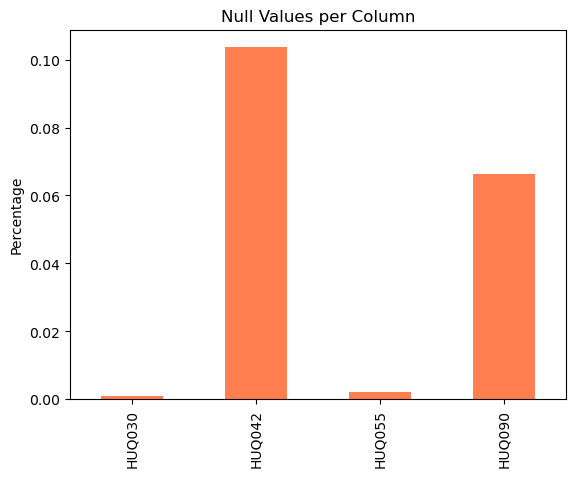

In [118]:
care_access_df = pd.read_csv('data/raw data files/healthcare_access.csv')

# keeping: seq num, yes/no routine place to go for healthcare, type of place, yes/no had a video conference with
# a doctor in the past 12 months, yes/no seen a mental health professional in past year
care_access_df = care_access_df[['SEQN', 'HUQ030', 'HUQ042', 'HUQ055', 'HUQ090']]

# converting 'Refuse' and 'Don't Know' to null
for col in ['HUQ030', 'HUQ042', 'HUQ055', 'HUQ090']:
    care_access_df[col] = care_access_df[col].replace([7, 9, 77, 99], np.nan)

# visualizing amount of null values
null_count = care_access_df.isnull().sum() / len(care_access_df)
null_count[null_count > 0].plot(kind='bar', color='coral')
plt.title("Null Values per Column")
plt.ylabel("Percentage")
plt.show()

In [122]:
# since percentage of null values are less than 0.33 (or about a third) we can drop rows with null values
care_access_df = care_access_df.dropna(subset=['HUQ030', 'HUQ042', 'HUQ090','HUQ055'], how='any')
care_access_df

,SEQN,HUQ030,HUQ042,HUQ055,HUQ090
0,130378.0,1.0,1.0,2.0,2.0
1,130379.0,1.0,1.0,1.0,2.0
2,130380.0,1.0,1.0,1.0,2.0
3,130381.0,1.0,1.0,2.0,2.0
7,130385.0,1.0,1.0,2.0,2.0
...,...,...,...,...,...
11926,142304.0,1.0,2.0,1.0,1.0
11927,142305.0,1.0,1.0,2.0,1.0
11929,142307.0,1.0,1.0,2.0,2.0
11931,142309.0,1.0,4.0,2.0,2.0


In [151]:
insurance_df = pd.read_csv('data/raw data files/health_insurance.csv')

insurance_df = insurance_df[['SEQN', 'HIQ011', 'HIQ032A', 'HIQ032B', 'HIQ032D', 'HIQ032F', 'HIQ032H', 'HIQ032I']]
insurance_df['HIQ011'] = insurance_df['HIQ011'].replace([7, 9], np.nan)

# dropping rows where there was no response for HIQ011 'whether someone was insured or not'
insurance_df = insurance_df.dropna(subset=['HIQ011'], how='any')

# if HIQ011 was 'no' (uninsured), all column values should be 2 - 'No'
binary_cols = ['HIQ032A', 'HIQ032B', 'HIQ032D', 'HIQ032F', 'HIQ032H', 'HIQ032I']
insurance_df.loc[df['HIQ011'] == 2, binary_cols] = 2

# if individual is insured, replace null values with 2 - 'No' if they have a value in at least one other column
for col in binary_cols:
    other_cols = [c for c in binary_cols if c != col]
    has_other_insurance = insurance_df[other_cols].isin([1, 2, 4, 6, 8, 9]).any(axis=1)
    insurance_df.loc[(insurance_df['HIQ011'] == 1) & has_other_insurance & insurance_df[col].isna(), col] = 2

insurance_df

,SEQN,HIQ011,HIQ032A,HIQ032B,HIQ032D,HIQ032F,HIQ032H,HIQ032I
0,130378.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
1,130379.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
2,130380.0,1.0,2.0,2.0,2.0,2.0,8.0,2.0
3,130381.0,1.0,2.0,2.0,4.0,2.0,2.0,2.0
4,130382.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...
11927,142305.0,1.0,2.0,2.0,4.0,2.0,2.0,2.0
11929,142307.0,1.0,2.0,2.0,4.0,2.0,2.0,2.0
11930,142308.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
11931,142309.0,1.0,1.0,2.0,2.0,6.0,2.0,2.0


In [152]:
merged_df = pd.merge(demo_df, bm_df, on='SEQN')
merged_df = pd.merge(merged_df, bp_df, on='SEQN')
for df in [glu_df, hdlpl_df, vitd_df, gly_df, total_chol_df, exercise_df, income_df, care_access_df, insurance_df]:
    merged_df = pd.merge(merged_df, df, on='SEQN')

merged_df

,SEQN,RIAGENDR,RIDAGEYR,DMDEDUC2,INDFMPIR,BMXBMI,BMXHIP,BMXHT,BMXWAIST,BMXWT,...,HUQ042,HUQ055,HUQ090,HIQ011,HIQ032A,HIQ032B,HIQ032D,HIQ032F,HIQ032H,HIQ032I
0,130378.0,1.0,43.0,5.0,5.00,27.0,102.9,179.5,98.3,86.9,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
1,130379.0,1.0,66.0,5.0,5.00,33.5,112.4,174.2,114.7,101.8,...,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
2,130380.0,2.0,44.0,3.0,1.41,29.7,98.0,152.9,93.5,69.4,...,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,8.0,2.0
3,130386.0,1.0,34.0,4.0,1.33,30.2,110.6,173.3,106.1,90.6,...,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,8.0,2.0
4,130394.0,1.0,51.0,5.0,5.00,24.4,99.4,177.3,92.1,76.7,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,142288.0,2.0,54.0,4.0,3.42,23.1,98.0,158.7,84.6,58.2,...,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
2013,142299.0,1.0,33.0,4.0,3.28,35.7,113.3,178.5,121.8,113.8,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
2014,142303.0,2.0,69.0,3.0,0.98,27.9,104.5,159.2,111.0,70.8,...,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
2015,142305.0,2.0,76.0,1.0,2.25,26.4,96.4,151.4,89.0,60.4,...,1.0,2.0,1.0,1.0,2.0,2.0,4.0,2.0,2.0,2.0


In [153]:
merged_df.to_csv('data/merged_nhanes_data.csv')